In [2]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.bandstructure import PhononBandStructure, PhononBandStructureSymmLine
from pymatgen.phonon.plotter import PhononBSPlotter
import matplotlib.pyplot as plt
from math import pi

In [3]:
print("Création de la structure de bande de phonons...")
with MPRester("stzwdugeNELjqCAkcHa") as mpr:
    phonon_bs_line = mpr.get_phonon_bandstructure_by_material_id(material_id="mp-11327")
plotter = PhononBSPlotter(phonon_bs_line)
print("Terminée")

Création de la structure de bande de phonons...
Terminée


/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



Zone de Brillouin


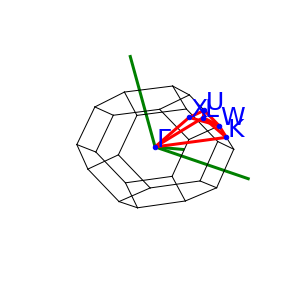

In [4]:
# Une représentation de la zone de Brillouin est affichée ci-dessous
print("Zone de Brillouin")
plotter.plot_brillouin()

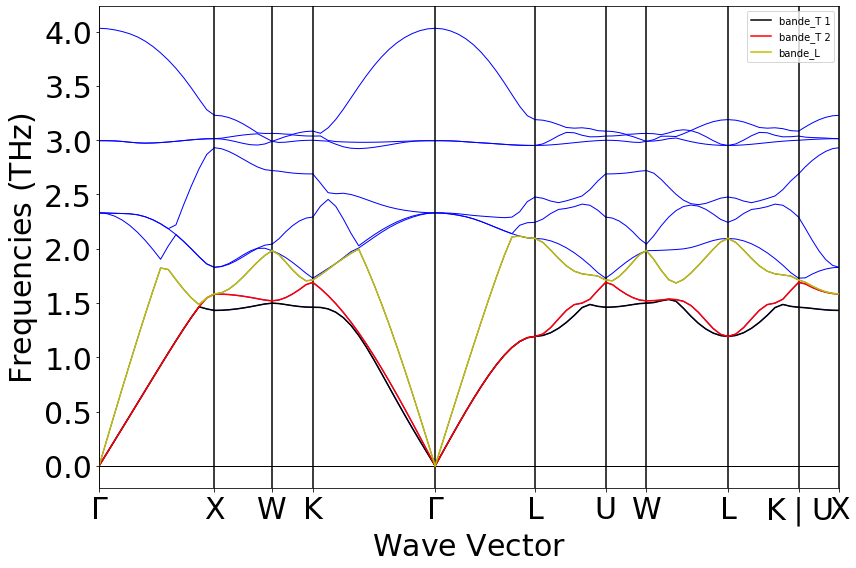

In [5]:
# Les branches acoustiques sont représentées ici.
# Nous nous intéressons aux 3 premières (2 branches transversales et 1 longitudinéle)
# et calculerons pour chacune la vitesse du son correspondante.

# Données utilisées
base_plot = plotter.get_plot(ylim=None, units='thz')
data = plotter.bs_plot_data()
all_dist = data['distances']
frequ = data['frequency']

# Colorer et légender les 3 branches d'intérêt
c = ['k','r','y']
labels=["bande_T 1", "bande_T 2", "bande_L"]

for b in range(3):
    for i in range(10):
        x = all_dist[i]
        y = frequ[i][b]
        if i == 0:
            plt.plot(x,y,c[b],label=labels[b])
        else:
            plt.plot(x,y,c[b])
    
plt.legend()
plt.show()

Vitesse du son $$v_s = |\frac{d \omega}{d k}(k=0)|$$

In [7]:
# Vitesses du son
# Ces vitesses se calculent en dérivant la fréquence angulaire par rapport à k (voir expression ci-dessus)

# Le centre du domaine réciproque correspond au point Gamma.
# Les vitesses des 3 premières branches sont respectivement calculées
# dans les directions (Gamma-X), (Gamma-K) et (Gamma-L).

# Indices des domaines (et positions) pour calculer les vitesses du son
dom_v1 = [0, 0, 1] # domaine, base, direction
dom_v2 = [3, -1, -2]
dom_v3 = [4, 0, 1]
dom_v = [dom_v1, dom_v2, dom_v3]
directions = ["Gamma-X", "Gamma-K", "Gamma-L"]

print("Vitesses du son en 'unités atomiques de longueur * THz' (Angstrom/fs)")
for d in range(3):
    # Calcul numérique de la vitesse à partir de 2 points (les plus proches de k=0)
    x0 = all_dist[dom_v[d][0]][dom_v[d][1]]
    x1 = all_dist[dom_v[d][0]][dom_v[d][2]]
    y0 = frequ[dom_v[d][0]][d][dom_v[d][1]]
    y1 = frequ[dom_v[d][0]][d][dom_v[d][2]]
    v_s = 2*pi*abs((y1-y0)/(x1-x0))
    v_s_ms = v_s*1e-10*1e12

    print("\tBranche acoustique", d+1, "dans la direction", directions[d], ":", v_s, "(soit", v_s_ms, "m/s)")

Vitesses du son en 'unités atomiques de longueur * THz' (Angstrom/fs)
	Branche acoustique 1 dans la direction Gamma-X : 13.706301398605056 (soit 1370.6301398605058 m/s)
	Branche acoustique 2 dans la direction Gamma-K : 16.03440921337222 (soit 1603.440921337222 m/s)
	Branche acoustique 3 dans la direction Gamma-L : 26.773936300176555 (soit 2677.3936300176556 m/s)
